### GPU, Exercise 7
Eetu Knutars, 2.3.2025

## Task 1
PyTorch tensors can be created by constructors or using conversions from other types of arrays. They can be directly created on a desired device or copied from one device to another.

Experiment with PyTorch tensors as follows:

- Prepare startup code for allowing CPU and GPU execution.
- Create one 3D tensor of size 128^3 to the main memory (CPU) and another to the GPU memory. The tensor elements should be double precision (64-bit) floating point numbers that are sampled from the normal probability distribution with zero mean and unit variance. Determine how much memory each tensors reserves.
- Perform matrix multiplication on the GPU with the tensors and serialise the result to storage.
- If possible, examine the memory utilisation on the GPU while varying the tensor sizes. Does the information reflect the true utilisation of memory?

*Hints: device, element_size, nelement, to, empty_cache.*

In [28]:
import torch

# Defining the device (CPU or cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

print(f"GPU memory allocated at beginning: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")

# Create a 3D tensor of size 128^3 (double precision) on CPU
tensor_cpu = torch.randn((128, 128, 128), dtype=torch.float64)

# Copy the tensor to GPU
tensor_gpu = tensor_cpu.to(device)

print(f"GPU memory allocated after creating the tensor: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")

# Perform matrix multiplication (using slices for valid dimensions)
result = tensor_gpu @ tensor_gpu

print(f"GPU memory allocated after matrix multiplication: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")

# Serialize result to storage
torch.save(result, "result_tensor.pt")

torch.cuda.empty_cache()

Using device: cuda
GPU memory allocated at beginning: 0.00 MB
GPU memory allocated after creating the tensor: 16.00 MB
GPU memory allocated after matrix multiplication: 40.12 MB


## Task 2
A neural network (NN) is a machine learning model consisting of layers of neurons and nonlinearities in the form of activation functions. In the simplest form, only a single hidden layer is used in addition to the input and output layers. These models are typically trained in the supervised manner so that the desired outputs are known the each input. The training adjusts iteratively the model parameters, that is, the neuron weights and biases, and the model architecture and the training process are affected by hyperparameters.

Implement a NN with PyTorch. Take into account the following:

- Define the loss function according to the task.
- Use automatic differentiation (autograd) in the training loop.
- Select the hyperparameters so that the model is as simple as possible for solving the task in a reasonable way (Ockham's razor) and the training converges.
- Train the model with the given data and show that it works.

*Hints: autograd, nn.*

Epoch 0, Loss: 0.561646
Epoch 100, Loss: 0.011648
Epoch 200, Loss: 0.010207
Epoch 300, Loss: 0.009960
Epoch 400, Loss: 0.009913
Epoch 500, Loss: 0.009898
Epoch 600, Loss: 0.009890
Epoch 700, Loss: 0.009883
Epoch 800, Loss: 0.009877
Epoch 900, Loss: 0.009873


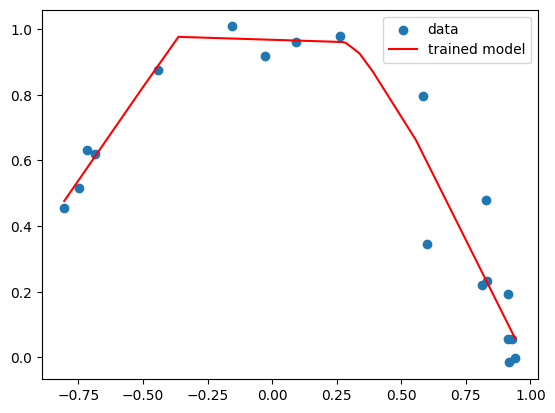

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "t005b.csv"  # data file
data = pd.read_csv(file_path)

# Storing the data to tensors
x = torch.tensor(data.iloc[:, 0].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(data.iloc[:, 1].values, dtype=torch.float32).view(-1, 1)

# Define a simple neural network, one hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 50)  # One hidden layer
        self.output = nn.Linear(50, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model, define the loss function and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion(predictions, y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

# Visualisation
plt.scatter(x.numpy(), y.numpy(), label="data")
x_fit = torch.linspace(x.min(), x.max(), 1000).view(-1, 1)
y_fit = model(x_fit).detach().numpy()
plt.plot(x_fit.numpy(), y_fit, label="trained model", color='red')
plt.legend()
plt.show()

## Task 3
PyTorch offers a comprehensive selection of mathematical operators on tensors. These operations can be executed on a CPU or a GPU, and many of the operations are much faster on a GPU.

Experiment with PyTorch tensor operations as follows:

- Prepare startup code so that the same code can be executed on a CPU and a GPU.
- Create a reasonably large 2D tensor of random numbers to the main memory (CPU) and another one of the same size to the GPU memory.
- Perform eigenvalue decomposition of the tensors and compare the execution times of both cases so that the measurement is performed properly.

*Hints: torch.linalg, torch.cuda.Event, torch.cuda.synchronize.*

In [29]:
import torch
import time

# Function for eigenvalue decomposition for random matrices
# input parameters are the device used and matrix size
# outputs the time used for computation
def measure_time(device, size=(1000, 1000)):
    tensor = torch.rand(size, device=device)

    # Measuring the time
    start_time = time.time()
    eigvals, eigvecs = torch.linalg.eig(tensor)
    end_time = time.time()

    return end_time - start_time

# Define devices for CPU and GPU
device_cpu = torch.device("cpu")
device_gpu = torch.device("cuda")

# Matrix size
N = 2000
matrix_size = (N, N)

# Measure CPU time
cpu_time = measure_time(device_cpu, matrix_size)
print(f"Eigenvalue decomposition time on CPU: {cpu_time:.6f} seconds")

# Measure GPU time
gpu_time = measure_time(device_gpu, matrix_size)
print(f"Eigenvalue decomposition time on GPU: {gpu_time:.6f} seconds")

torch.cuda.empty_cache()

Eigenvalue decomposition time on CPU: 4.710983 seconds
Eigenvalue decomposition time on GPU: 2.584207 seconds
